# Tutorial: Matplotlib

In [1]:
__author__ = "Allenyummy"
__date__ = "June 11, 2020"

## Step 0 - Import packages

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Step 1 - Read data

In [3]:
data = pd.read_csv('tutorial_data_preprocessing_by_pandas_scikit_learn/air_pollution_data.csv')

## drop row with all nan values
data.dropna(how='all', inplace=True)

## rename column name
col_name_map = {'序號': 'serial_num',
                         '縣市': 'city',
                         '測站': 'station',
                         '監測日期': 'date',
                         '監測時間': 'hour',
                         '污染物': 'pollutant',
                         '污染程度': 'degree_of_pollution',
                         'PSI值': 'PSI',
                         '二氧化硫(ppb)': 'SO2',
                         '一氧化碳(ppm)': 'CO',
                         '臭氧(ppb)': 'O3',
                         '懸浮微粒(μg/m3)': 'PM10',
                         '細懸浮微粒(μg/m3)': 'PM25',
                         '二氧化氮(ppb)': 'NO2',
                         '風速(m/sec)': 'wind_speed',
                         'AQI值': 'AQI',
                         '臭氧8小時移動平均(ppb)': 'O3_ma8',
                         '氮氧化物(ppb)(NOx)': 'NOx',
                         '一氧化氮(ppb)(NO)': 'NO',
                         '風向(degrees)': 'degrees',
                         '一氧化碳8小時移動平均(ppb)': 'CO_ma8',
                         '懸浮微粒移動平均值(μg/m3)': 'PM10_ma',
                         '細懸浮微粒移動平均值(μg/m3)': 'PM25_ma'}
data.rename(columns=col_name_map, inplace=True)

## acending time order
data = data.iloc[::-1]
data.index = range(0, len(data))

## preprocess time 
data['time'] = data['date'] + ' ' + data['hour'].str.slice(0, -1)
data['time'] = pd.to_datetime(data['time'], format='%Y/%m/%d %H')
data.drop(columns=['date', 'hour'], inplace=True)

data

,serial_num,city,station,pollutant,degree_of_pollution,PSI,SO2,CO,O3,PM10,...,wind_speed,AQI,O3_ma8,NOx,NO,degrees,CO_ma8,PM10_ma,PM25_ma,time
0,8227.0,臺北市,古亭,NaN,良好,NaN,1.8,0.25,33.0,10.0,...,2.7,27.0,29.0,10.0,1.0,90.0,0.0,11.0,7.0,2019-01-01 00:00:00
1,8226.0,臺北市,古亭,NaN,良好,NaN,2.4,0.24,35.0,14.0,...,2.3,28.0,30.0,8.0,1.0,86.0,0.0,11.0,8.0,2019-01-01 01:00:00
2,8225.0,臺北市,古亭,NaN,良好,NaN,1.2,0.23,35.0,11.0,...,3.0,29.0,31.0,9.0,1.0,88.0,0.0,11.0,8.0,2019-01-01 02:00:00
3,8224.0,臺北市,古亭,NaN,良好,NaN,1.2,0.21,37.0,7.0,...,3.0,31.0,33.0,7.0,1.0,84.0,0.0,11.0,8.0,2019-01-01 03:00:00
4,8223.0,臺北市,古亭,NaN,良好,NaN,1.2,0.20,38.0,13.0,...,2.6,31.0,34.0,5.0,0.0,77.0,0.0,11.0,8.0,2019-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8222,5.0,臺北市,古亭,細懸浮微粒,普通,NaN,2.8,0.41,26.0,25.0,...,2.2,53.0,26.0,20.0,1.0,82.0,0.0,25.0,16.0,2019-12-31 19:00:00
8223,4.0,臺北市,古亭,細懸浮微粒,普通,NaN,2.0,0.32,31.0,21.0,...,2.4,53.0,26.0,14.0,1.0,68.0,0.0,25.0,16.0,2019-12-31 20:00:00
8224,3.0,臺北市,古亭,NaN,良好,NaN,1.6,0.24,38.0,22.0,...,2.8,49.0,27.0,9.0,1.0,81.0,0.0,24.0,15.0,2019-12-31 21:00:00
8225,2.0,臺北市,古亭,NaN,良好,NaN,1.4,0.25,36.0,23.0,...,2.0,46.0,28.0,7.0,0.0,82.0,0.0,23.0,14.0,2019-12-31 22:00:00


## Plot line

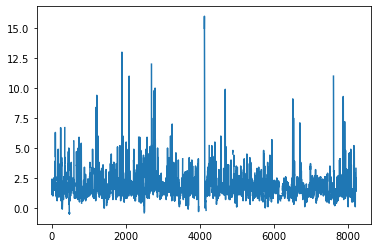

In [4]:
plt.plot(np.arange(len(data)), data['SO2'])

## Plot scatter diagram

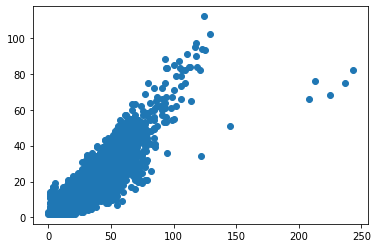

In [5]:
plt.scatter(data['PM10'], data['PM25'])

## Plot bar 

<BarContainer object of 2 artists>

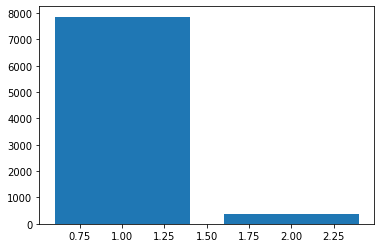

In [6]:
not_nan = data['SO2'].count()
nan = len(data) - not_nan
plt.bar([1,2], [not_nan, nan])

## Plot histogram

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 787., 2257., 2553., 1138.,  629.,  336.,  167.,   99.,   40.,
          46.]),
 array([  7. ,  23.1,  39.2,  55.3,  71.4,  87.5, 103.6, 119.7, 135.8,
        151.9, 168. ]),
 <a list of 10 Patch objects>)

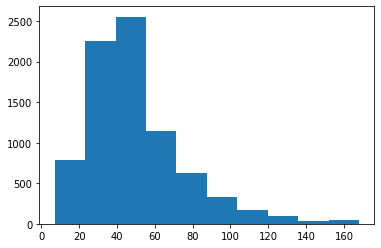

In [7]:
plt.hist(data['AQI'])

## Plot box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x11d952d10>,
 'caps': [<matplotlib.lines.Line2D at 0x11d95a810>,
 'boxes': [<matplotlib.lines.Line2D at 0x11d952110>],
 'medians': [<matplotlib.lines.Line2D at 0x11d952dd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x11da60790>],
 'means': []}

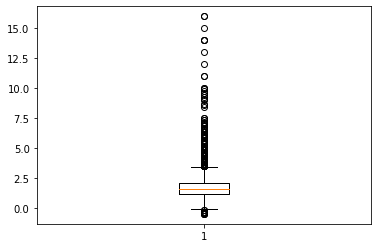

In [8]:
plt.boxplot(data['SO2'].dropna())

## Plot two lines and more details in the figure 

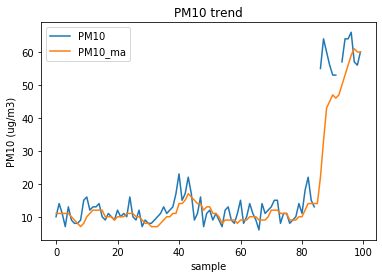

In [9]:
plt.plot(data['PM10'][:100])
plt.plot(data['PM10_ma'][:100])

plt.xlabel('sample')
plt.ylabel('PM10 (ug/m3)')

plt.title('PM10 trend')

plt.legend(['PM10', 'PM10_ma'])

## Plot fill between

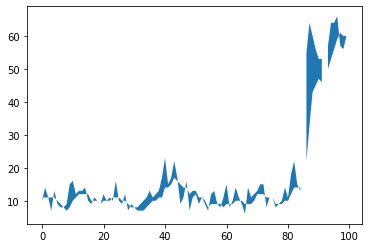

In [10]:
plt.fill_between(np.arange(100), data['PM10'][:100], data['PM10_ma'][:100])

## Plot subplots

/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


{'whiskers': [<matplotlib.lines.Line2D at 0x11dd837d0>,
 'caps': [<matplotlib.lines.Line2D at 0x11ddadb90>,
 'boxes': [<matplotlib.lines.Line2D at 0x11dd838d0>],
 'medians': [<matplotlib.lines.Line2D at 0x11ddb7610>],
 'fliers': [<matplotlib.lines.Line2D at 0x11ddb7b10>],
 'means': []}

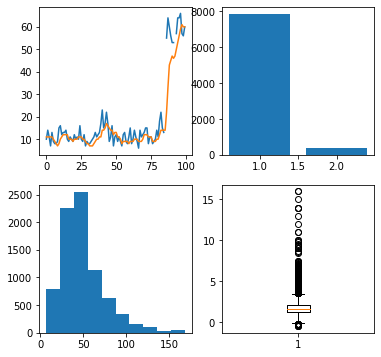

In [11]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(6, 6))

ax1.plot(data['PM10'][:100])
ax1.plot(data['PM10_ma'][:100])
ax2.bar([1,2], [not_nan, nan])
ax3.hist(data['AQI'])
ax4.boxplot(data['SO2'].dropna())

## Plot y1 and y2

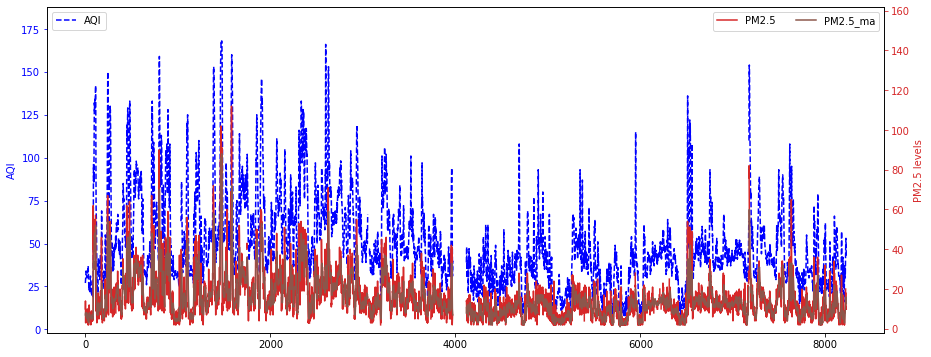

In [12]:
fig1, ax1 = plt.subplots(figsize=(15,6))

#-----right y (wind_speed)------#
ax1.plot(data.AQI, 'b--', linewidth = 1.5, markersize = 3)
ax1.set_ylim([-2, data.AQI.max()+20])
ax1.set_ylabel('AQI', color='b')
ax1.tick_params('y', colors='b')
ax1.legend(['AQI'], loc = 'upper left')

#-----left y (pm25)------#
ax2 = ax1.twinx()
ax2.set_ylim([-2,data.PM25.max()+50])
ax2.plot(data.PM25, 'C3-', linewidth = 1.5)
ax2.plot(data.PM25_ma, 'C5-', linewidth = 1.5)
ax2.legend(['PM2.5', 'PM2.5_ma'], ncol = 2, loc = 'upper right')
ax2.set_ylabel('PM2.5 levels', color='C3')
ax2.tick_params('y', colors='C3')